In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

np.random.seed(42)

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Логистическая регрессия

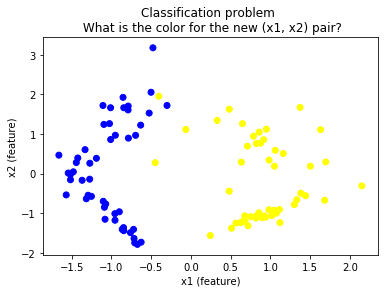

In [4]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=1)

colors = ['yellow' if y_i else 'blue' for y_i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)");

# Линейный классификатор

Построим случайную прямую. Насколько хорошо она описывает данные?

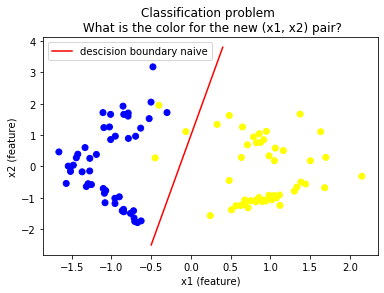

In [8]:
x_naive = np.arange(-0.5, 0.5, 0.1)
y_naive = 7 * x_naive + 1

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend();

## Как принимается решение

Простой вариант - узнать, с какой стороны от гиперплоскости находится точка

$$\hat{y} = sign(x\theta)$$

In [5]:
w = np.array([7, -1, 1]) # Ax + By + C = 0
     
# Замечание: расстояние от точки (x0, y0) до прямой Ax + By + C это abs(Ax0 + By0 + C) / sqrt(A^2 + B^2)

# функция предсказания
def predict(x, w):
    return np.sign(x.dot(w))

x_pred = np.hstack([np.random.rand(10, 2) * 4 - 2, np.ones(10).reshape(-1, 1)])
y_pred = predict(x_pred, w)

print(x_pred.shape)
print(y_pred.shape)

(10, 3)
(10,)


In [6]:
y_pred

array([-1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.])

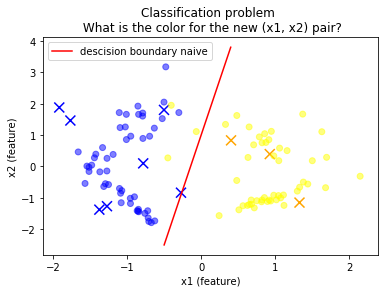

In [7]:
x_naive = np.arange(-0.5, 0.5, 0.1)
# naive boundary
y_naive = 7 * x_naive + 1


#крестики - точки, которые правильно классифицировали


plt.scatter(x_pred[:, 0], x_pred[:, 1], c=['orange' if y_i > 0 else 'blue' for y_i in y_pred], marker='x', s=100)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.5)
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend();

## Как оценить результат - простой вариант

Отступ (margin) - величина $M_i = y_i \cdot x_i\theta$ (для $y = 1$ или $y = -1$), где $x_i$ - элемент обучающей выборки, $y_i$ - его класс

$$M_i \leq 0 \Rightarrow y_i \neq \hat{y_i}$$
$$M_i > 0 \Rightarrow y_i = \hat{y_i}$$

Функция потерь zero-one loss:
$$ f(x) = \begin{cases}
      1, & \text{если}\space \hat{y} \neq y, \\
      0, & \text{если}\space \hat{y} = y
    \end{cases}
$$ 

Эмпирический риск:
$$L(\theta, x) = \frac{1}{n} \sum_{i=1}^{n} f(x) = \frac{1}{n} \sum_{i=1}^{n}[M_i < 0]$$

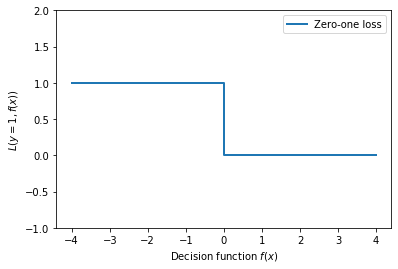

In [8]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
# plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 2));

In [9]:
from sklearn.metrics import zero_one_loss

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,1,0,1,0,1,0,1]
zero_one_loss(y_true, y_pred)

0.4

## Переформулируем задачу
Вместо класса будем предсказывать вероятность принадлежности классу

$$\hat{p} = \sigma(x\theta) $$

где 

$$\sigma(t)=\frac{1}{1 + exp(-t)}$$

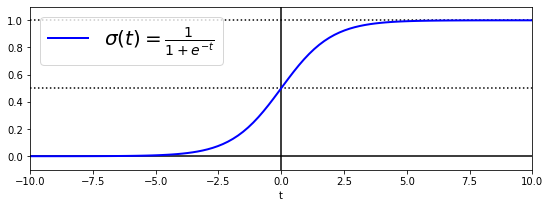

In [10]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show() 

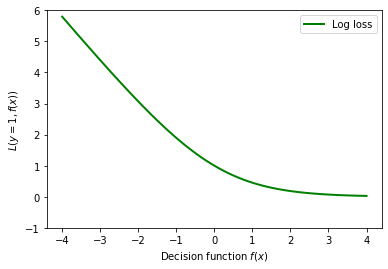

In [11]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
#plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 6));

## В sklearn

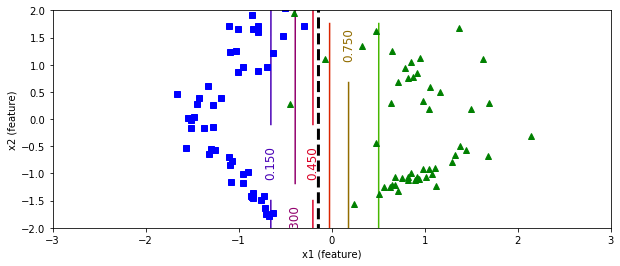

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(-2, 2, 500).reshape(-1, 1),
        np.linspace(-3, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)


plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.axis([-3, 3, -2, 2])
plt.show()

# Пример

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [49]:

data = pd.read_csv('column_2C_weka.csv')

# перекодируем целевую
data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

In [19]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


Разделим данные на train и test и нормируем.

In [20]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.2, random_state=2, stratify=data['class']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Обучим знакомый нам kNN в качестве baseline

In [50]:
# учим knn
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.823
Precision: 0.839
Recall: 0.892
f1_score: 0.865

Test quality:
Accuracy: 0.806
Precision: 0.833
Recall: 0.875
f1_score: 0.854


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty = 'none')

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.855
Precision: 0.887
Recall: 0.898
f1_score: 0.892

Test quality:
Accuracy: 0.823
Precision: 0.857
Recall: 0.878
f1_score: 0.867


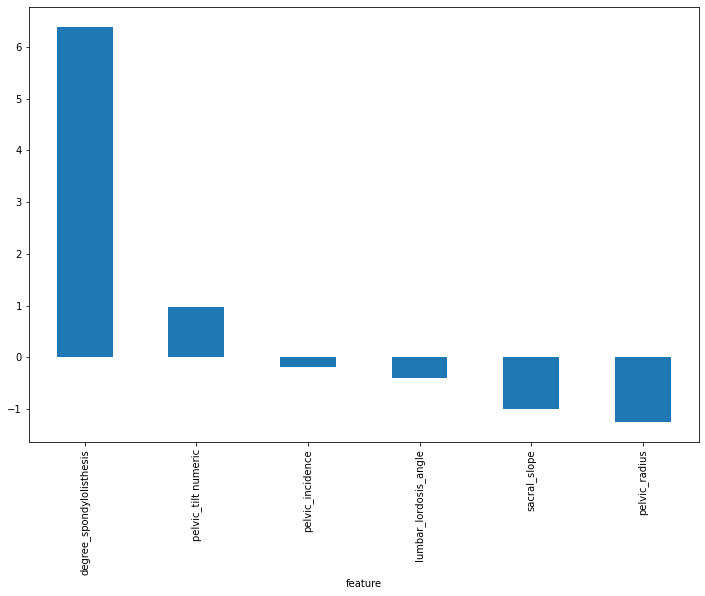

In [52]:
featureImportance = pd.DataFrame({"feature": data.drop('class',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

### Вероятности

In [53]:
log_reg.predict_proba(X_test_scaled)[:10]

array([[0.31748063, 0.68251937],
       [0.99816225, 0.00183775],
       [0.64402773, 0.35597227],
       [0.55791146, 0.44208854],
       [0.19900176, 0.80099824],
       [0.07594606, 0.92405394],
       [0.01228527, 0.98771473],
       [0.01003731, 0.98996269],
       [0.00158151, 0.99841849],
       [0.22044069, 0.77955931]])

In [54]:
log_reg.predict(X_test_scaled)[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

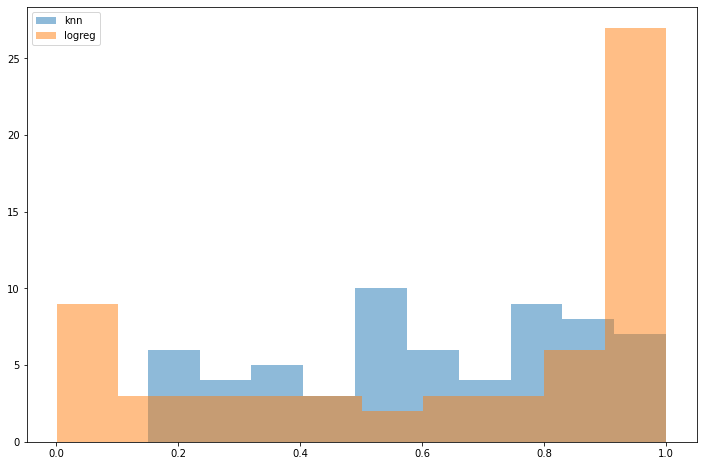

In [55]:
plt.hist(knn.predict_proba(X_test_scaled)[:, 1], alpha=0.5, label = 'knn');
plt.hist(log_reg.predict_proba(X_test_scaled)[:, 1], alpha=0.5, label = 'logreg');
plt.legend();

В презентацию.

## ROC_AUC

In [56]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC ', round(roc_auc_score(y_test, log_reg.predict(X_test_scaled)),3))

ROC-AUC  0.804


## Регуляризация


* Добавить дополнительное ограничение на норму вектора весов $R(\omega)$:
$$
LogLoss+\lambda R(\omega)\to\min_{\beta}
$$
* $\lambda>0$ - гиперпараметр.
* $R(\omega)$ штраф за сложность модели.


$$
\begin{array}{ll}
R(\omega)=||\omega||_{1} &  \mbox{(L1) Lasso regression}\\
R(\omega)=||\omega||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$


### L2 Ridge

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1]}

log_reg = LogisticRegression(penalty = 'l2')
clf = GridSearchCV(log_reg, parameters, scoring = 'roc_auc', cv = 23)
clf.fit(data.drop(['class'], axis=1), data['class'])


GridSearchCV(cv=23, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, scoring='roc_auc')

In [59]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.931280
1,0.01,0.935870
2,0.1,0.933575
3,1,0.933575


In [61]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 0.01} 	 Best score:  0.9358695652173913


### L1 Lasso

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf = GridSearchCV(log_reg, parameters, scoring = 'roc_auc', cv = 23)
clf.fit(data.drop(['class'], axis=1), data['class'])


GridSearchCV(cv=23,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [64]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.867754
1,0.01,0.881884
2,0.1,0.904589
3,1,0.925242
4,10,0.934783
5,100,0.933575


In [65]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 10} 	 Best score:  0.9347826086956522
